# Solving the Simple Harmonic Oscillator ODEs
See: https://www.complexityexplorer.org/courses/79-nonlinear-dynamics-mathematical-and-computational-approaches-fall-2017/segments/6271

In [14]:
function forward_euler_solver(x_curr; ODE=(f(x)=[0 1; -1 0]*x), t_step=.1)
    
    x_next = x_curr + t_step * ODE(x_curr)
    return x_next
end

forward_euler_solver (generic function with 1 method)

In [15]:
forward_euler_solver([1;0])

2-element Array{Float64,1}:
  1.0
 -0.1

In [16]:
function backward_euler(x_curr; ODE=(x -> [0 1; -1 0]*x), t_step=.1)
    x_rough = forward_euler_solver(x_curr, ODE=ODE, t_step=t_step)
    x_next = x_curr + t_step*ODE(x_rough)
end

backward_euler (generic function with 1 method)

In [17]:
function iterate_solver(;solver=(s(x) = x), init_condition=[1;1], steps=10)
    #assumes init_condition at t=0
    #solver is numerical ode that takes in x and outputs x_next
    #init_condition is an array of (pos, vel.) (x)
    #ODE takes in x and outputs xdot
    states = zeros(steps,2)
    x = init_condition
    for i = 1:steps
        x = solver(x)
        states[i,:] = x
    end
    return states
end

iterate_solver (generic function with 1 method)

In [18]:
ode(x) = [ 0 1; -4 0]*x #SHO with k=2, m=.5, B=0, g=0

ode (generic function with 1 method)

In [19]:
ode([2,1.1])

2-element Array{Float64,1}:
  1.1
 -8.0

In [21]:
forward_euler_solver([-1,-2], ODE=ode, t_step=.11)

2-element Array{Float64,1}:
 -1.22
 -1.56

In [22]:
j(x) = backward_euler(x, t_step=.1, ODE = ode)
iterate_solver(solver=j, init_condition=[-1;-2], steps=5)

5×2 Array{Float64,2}:
 -1.16     -1.52     
 -1.2656   -0.9952   
 -1.3145   -0.449152 
 -1.30683   0.0946125
 -1.2451    0.613561 

In [23]:
using PyPlot

INFO: Precompiling module PyPlot.


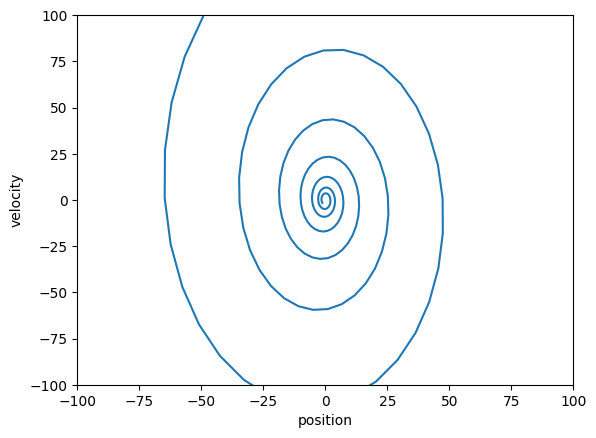

PyObject <matplotlib.text.Text object at 0x7f1389f8edd0>

In [26]:
s(x) = forward_euler_solver(x, ODE=ode, t_step=.1)
states = iterate_solver(solver=s, init_condition=[-1;-2], steps=200 )
plot(states[:,1], states[:,2])
xlim([-100,100])
ylim([-100,100])
xlabel("position")
ylabel("velocity")
#states[1,:]

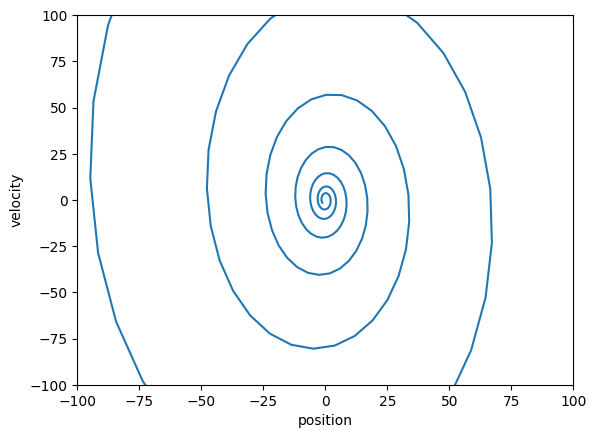

PyObject <matplotlib.text.Text object at 0x7f1389f0bf50>

In [27]:
r(x) = forward_euler_solver(x, ODE=ode, t_step=.11)
states = iterate_solver(solver=r, init_condition=[-1;-2], steps=200 )
plot(states[:,1], states[:,2])
#states[1,:]
xlim([-100,100])
ylim([-100,100])
xlabel("position")
ylabel("velocity")

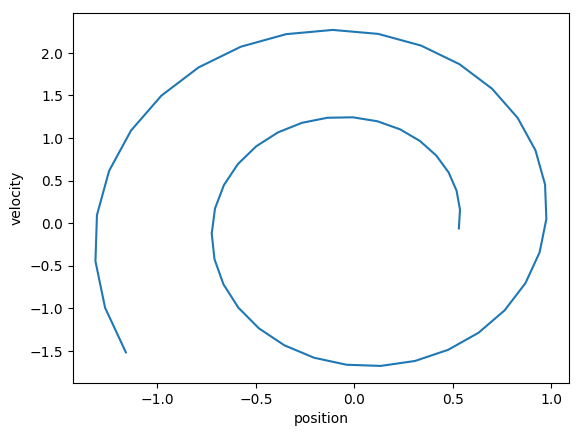

PyObject <matplotlib.text.Text object at 0x7f1389f2cbd0>

In [29]:
w(x) = backward_euler(x, ODE=ode, t_step=.10)
states = iterate_solver(solver=w, init_condition=[-1;-2], steps=50 )
plot(states[:,1], states[:,2])
xlabel("position")
ylabel("velocity")
#states[1,:]

## Question 4
*Forward and backward Euler employ different information about the vector field to move forwards in state space.  Based on your experience with these two methods, derive a third method that uses both a forward and backward Euler step to improve accuracy.*

Ideas:
- average the two results >> on this now
- sum the two results (vector sum)

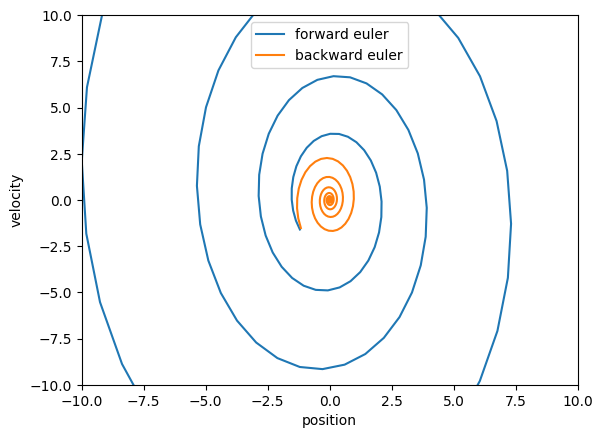

PyObject <matplotlib.legend.Legend object at 0x7f1389bfa950>

In [30]:
step = .1
n_step = 200
F(x) = forward_euler_solver(x, ODE=ode, t_step=step)
B(x) = backward_euler(x, ODE=ode, t_step=step)
states_f = iterate_solver(solver=F, init_condition=[-1;-2], steps=n_step )
states_b = iterate_solver(solver=B, init_condition=[-1;-2], steps=n_step )
plot(states_f[:,1], states_f[:,2], label="forward euler")
plot(states_b[:,1], states_b[:,2], label="backward euler")
xlim([-10,10])
ylim([-10,10])
xlabel("position")
ylabel("velocity")
legend()

In [31]:
function mean_vector(a,b)
    c = hcat(a,b)
    m = mean(c,2)
    return m
end

mean_vector (generic function with 1 method)

In [32]:
function average_forward_backward(x_curr; ODE=(f(x)=[0 1; -1 0]*x), t_step=.1)
    x_f = forward_euler_solver(x_curr)
    x_b = backward_euler(x_curr)
    x_mean = mean_vector(x_f, x_b)
    return x_mean
end

average_forward_backward (generic function with 1 method)

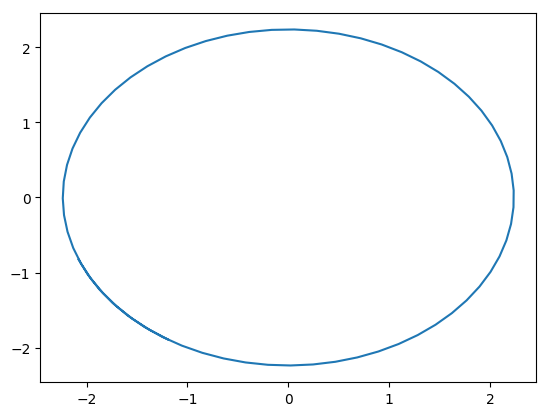

2.5

In [48]:
n_step = 70
#P(x) = forward_euler_solver(x, t_step= 100)
P(x) = average_forward_backward(x, t_step=.01)
states = iterate_solver(solver=P, init_condition=[-1;-2], steps=n_step )
ax = plot(states[:,1], states[:,2])
k = 2.5

### Observation
Using the average vector (element wise average so x = Avg(p1, p2), y = Avg(v1, v2) of vectors (p,v) ) results in a more accurate description of the system's dynamics: a cycle! BUT be careful. It might be that doing the average works well for circular state-space trajectories!